In [51]:
import math
import numpy as np
from PIL import Image

img = Image.open('4Labs.png')
img_arr = np.array(img)
img_arr_2 = img_arr
width, height = img.size

In [52]:
sigma = 3 
def gauss_weight(sigma_current, x, y, z): 
    total_weight = 0 
    for i in range(sigma_current):
        for j in range(sigma_current):
            
            sigma_curr_i = abs(i - sigma_current/2) 
            sigma_curr_j = abs(j - sigma_current//2) 
            sigma_curr = int(max(sigma_curr_i, sigma_curr_j))+1

            if sigma_curr == 2: 
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr+1)**2)+((j-sigma_curr+1)**2)) / (2*sigma_curr**2))
            else: 
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr)**2)+((j-sigma_curr)**2)) / (2*sigma_curr**2))
            
            total_weight += weight 
    
    avarage_pix_val = 0 
    
    for i in range(sigma_current):
        for j in range(sigma_current):
            
            sigma_curr_i = abs(i - sigma_current/2)
            sigma_curr_j = abs(j - sigma_current//2)
            sigma_curr = int(max(sigma_curr_i, sigma_curr_j))+1

            if sigma_curr == 2:
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr+1)**2)+((j-sigma_curr+1)**2)) / (2*sigma_curr**2))
            else: 
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr)**2)+((j-sigma_curr)**2)) / (2*sigma_curr**2))
                
            weight_percent = weight/total_weight*100 
            avarage_pix_val += weight_percent * img_arr[x+i, y+j, z]

    avarage_pix_val = avarage_pix_val/100 
    return(avarage_pix_val)

In [54]:
img_arr = np.array(img)
img_arr_2 = img_arr
sigma = 5 
def gauss_weight_5(sigma_current, x, y, z): 
    total_weight = 0 
    for i in range(sigma_current):
        for j in range(sigma_current):
            
            sigma_curr_i = abs(i - sigma_current/2) 
            sigma_curr_j = abs(j - sigma_current//2) 
            sigma_curr = int(max(sigma_curr_i, sigma_curr_j))+1

            if sigma_curr == 2: 
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr)**2)+((j-sigma_curr)**2)) / (2*sigma_curr**2))
            elif sigma_curr == 1: 
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr-1)**2)+((j-sigma_curr-1)**2)) / (2*sigma_curr**2))
            else:
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr+1)**2)+((j-sigma_curr+1)**2)) / (2*sigma_curr**2))
            
            total_weight += weight 
    
    avarage_pix_val = 0 
    
    for i in range(sigma_current):
        for j in range(sigma_current):
            
            sigma_curr_i = abs(i - sigma_current/2)
            sigma_curr_j = abs(j - sigma_current//2)
            sigma_curr = int(max(sigma_curr_i, sigma_curr_j))+1

            if sigma_curr == 2:
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr)**2)+((j-sigma_curr)**2)) / (2*sigma_curr**2))
            elif sigma_curr == 1: 
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr-1)**2)+((j-sigma_curr-1)**2)) / (2*sigma_curr**2))
            else:
                weight = (1/(2*math.pi*sigma_curr**2)) * np.exp(-(((i-sigma_curr+1)**2)+((j-sigma_curr+1)**2)) / (2*sigma_curr**2))
                
            weight_percent = weight/total_weight*100 
            avarage_pix_val += weight_percent * img_arr[x+i, y+j, z]

    avarage_pix_val = avarage_pix_val/100 
    return(avarage_pix_val)

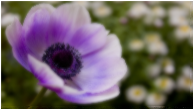

In [55]:
for i in range(height-4): 
    for j in range(width-4):
        img_arr_3[i+1, j+1, 0] = gauss_weight_5(sigma, i, j, 0) 
        img_arr_3[i+1, j+1, 1] = gauss_weight_5(sigma, i, j, 1) 
        img_arr_3[i+1, j+1, 2] = gauss_weight_5(sigma, i, j, 2)
        
Image.fromarray(img_arr_3, 'RGB')

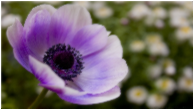

In [56]:
sigma = 3
for i in range(height-2): 
    for j in range(width-2):
        img_arr_2[i+1, j+1, 0] = gauss_weight(sigma, i, j, 0) 
        img_arr_2[i+1, j+1, 1] = gauss_weight(sigma, i, j, 1) 
        img_arr_2[i+1, j+1, 2] = gauss_weight(sigma, i, j, 2)
        
Image.fromarray(img_arr_2, 'RGB')

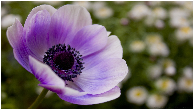

In [57]:
img

In [58]:
DoG = img_arr_2 - img_arr_3

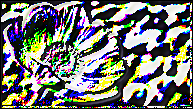

In [60]:
Image.fromarray(DoG, 'RGB')

In [61]:
# Обрезаем значения меньше 0 и больше 255
DoG = np.clip(DoG, 0, 255)
# Нормализуем изоражение для того, чтобы было видно границы
DoG = DoG * 255
DoG = np.clip(DoG, 0, 255)
# Возвращаем массив в целочисленных значениях
DoG = DoG.astype(np.uint8)

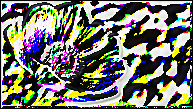

In [62]:
Image.fromarray(DoG, 'RGB')